# Example code for connecting a Sciospec device

## EIT device

**USB-HS**

If you have issues with the connection try [this](https://eblot.github.io/pyftdi/installation.html).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sciopy import EIT_16_32_64_128, EitMeasurementSetup

In [2]:
# create a 'sciospec' class which represents the sciospec EIT device
n_el = 16
sciospec = EIT_16_32_64_128(n_el)

In [3]:
# connect device via USB-HS port
sciospec.connect_device_HS()

In [4]:
# read system message buffer
sciospec.SystemMessageCallback()
# should be empty

No message inside the message buffer
message buffer:
 []
message length:	 0


In [11]:
# create a measurement setup
setup = EitMeasurementSetup(
    burst_count=5,
    n_el=n_el,
    exc_freq=125_000,
    framerate=3,
    amplitude=0.01,
    inj_skip=3,
    gain=1,
    adc_range=1,
)

In [12]:
sciospec.SetMeasurementSetup(setup)

Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18']
message length:	 4
Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18']
message length:	 4
Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18']
message length:	 4
Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18']
message length:	 4


In [13]:
# get data
data = sciospec.StartStopMeasurement(return_as="pot_mat")  # or "hex"  # kommt in for schleife 

In [14]:
data.shape   #mitteln, 1-4 burst count für training, und 5. für test 

(5, 16, 16)

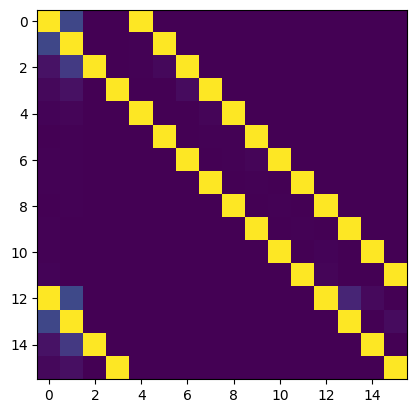

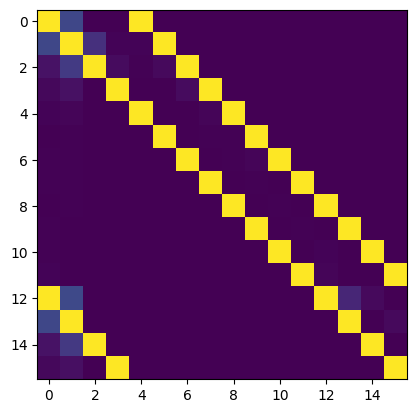

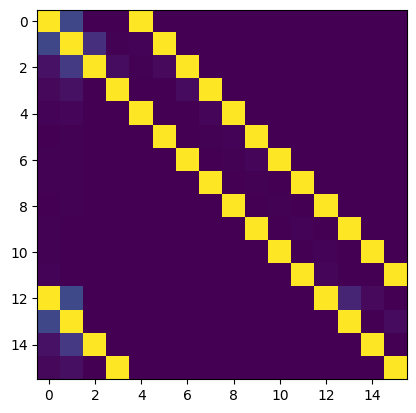

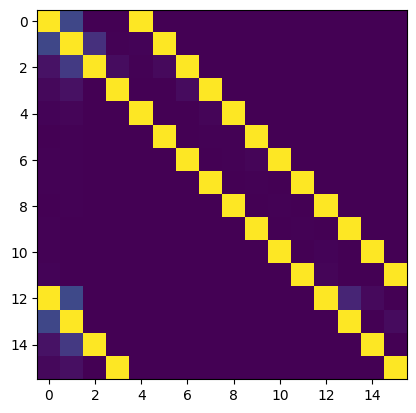

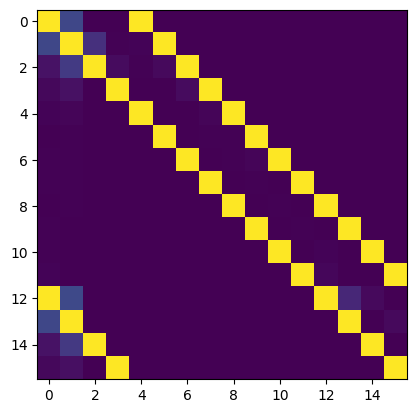

In [15]:
for pot in data:
    plt.imshow(np.abs(pot))
    plt.show()

In [ ]:
# reset the device software (may take a while ~5s, have a look at the LEDs)
sciospec.SoftwareReset()

## EIS device

**USB-HS**

In [ ]:
# TBD

In [ ]:
data.shape